### Case Study 1

Assume you are new to the data science field, and you want to find out what real practitioners and wannabe data scientists are concerned about. One place where you may find such information is Twitter. However, Twitter users often use their real identities and may have reservations about sharing all their opinions publicly. Another place where such information maybe found is the datascience subreddit on Reddit.com (https://www.reddit.com/r/datascience/). Users are assumed to be anonymous and they are more likely to share their opinions without reservations. To find out common concerns among the datascience subreddit users, it might be a good idea to collect the top 100 posts in the subreddit in the year 2021. You might also collect the top 3 comments of each of those posts. In this case study, we will do exactly that. Specific details can be found in the next few cells. 

This data can be used for many different projects. However, we are only going to focus on the "data gathering" part. We will also do some cleaning.

**Note**: This case study contributes 12.5% to your overall grade.

## Step 1: 
###  15 points


**Description:** 

Learn about the **praw** package for Python and learn how you can use it to load reddit posts, comments etc. on a Jupyter Notebook. Do a Google search. You might find tutorials. It is okay to use them. You may need to use secret keys for this part. For that you will need to open a Reddit account. You can use a throwaway account for this purpose. Write your code in the cell below. Any code you write to retrieve data from Reddit can go there.

**Grading criteria:** 

The code for this step must be correct. Otherwise, the next steps cannot be completed. In that case, the next steps will not be graded. If you receive a praw object from the data science subreddit, you will get full 15 points.' Other methods may be considered, but not encouraged.

In [3]:
# your code for step 1 goes here
import praw
reddit = praw.Reddit(client_id = 'UCSwkRYIyqzGgrxlm1Cj5w',
                     client_secret = 'Hltij57C_ef1GBTYzHcPzZvX1ZHCHQ',
                     username = 'Cold-Cheesecake4900',
                     password = 'Cookies42069!',
                     user_agent = 'fakebot')













## Step 2: 
### 10 + 20 + 10 + 15 + 5 + 5 = 65 points

**Description**:
Once you have the mechanism in place to retrieve data from Reddit, you next step is to determine which parts of the data is necessary. For this case study, collect only the top posts from the year 2021. Also consider if the score of each post was above 50 or not. If the score was below 50, it might not have been an important post. Do not consider those posts. 

You may also observe that sometimes posts with memes or jokes get a lot of 'upvotes,' and because of that they may  have high scores, but they may not be useful for this case study. To address this problem, you will simply get rid of any post that has fewer than 5 words in the title. 

You will also notice that praw returns time as an integer. It is inconvenient for us to read time like that. You may want to convert the integer time to human readable time. You do not need to mention hours, minutes, or seconds. Just year, month and date is enough.

**Grading Criteria:**
* posts are only from the year 2021: 10 points
* the integer time format converted into year-month-day: 20 points
* only posts with scores more than 50 were considered: 10 points
* only post titles with more than 5 words were kept: 15 points
* minimum 100 posts were collected: 5 points
* three comments collected for each post: 5 points

Note: All six grading criteria can be satified by writing one line or many lines of code. It does not matter. As long as your code satisfies the six criteria (in one line or many lines), you will get full points. Otherwise, you will get partial credits.

In [4]:
#Nuclear Option: USE THIS TO OBTAIN EVERYTHING BUT THE COMMENTS

import praw
reddit = praw.Reddit(client_id = 'UCSwkRYIyqzGgrxlm1Cj5w',
                     client_secret = 'Hltij57C_ef1GBTYzHcPzZvX1ZHCHQ',
                     username = 'Cold-Cheesecake4900',
                     password = 'Cookies42069!',
                     user_agent = 'fakebot')

# your code for step 2 goes here
from datetime import datetime

#Access data science subreddit and limit to 375 posts. This generates the 100 post min needed for the assignment
top_data_sci = reddit.subreddit('datascience').top(limit = 375)

title_list = []

up_list = []

time_list = []

comment_list = []

#Submission in the for loop searchs the posts in the subreddit 
for submission in top_data_sci:
    
    #Store the unix time for posts
    submission_time = submission.created_utc
    
    #Removes the "more comments" from the object data
    submission.comments.replace_more(limit=0)

    #Loops through the comments in each post
    for top_level_comments in submission.comments[:1]:
        
        #Limiting criteria for each post. Checks upvotes, title, and submission time.
        if submission.ups > 50 and len(submission.title.split()) > 5 and \
        submission_time >= 1609477200:
        
            #Save comments for any future debugging efforts. Otherwise code just adds data to lists. 
            #print(20*'-')
            
            #print("The title of the post: ", submission.title)
            
            title_list.append(submission.title)
            
            #print("Number of upvotes: ", submission.ups)
            
            up_list.append(submission.ups)
            
            #print("Length of title: ", len(submission.title.split()))                         
            
            #print("This post was submitted on: " + str(datetime.fromtimestamp(submission_time))[:10])
            submission_times = list(str(datetime.fromtimestamp(submission_time))[:10])
            time_list.append(str(datetime.fromtimestamp(submission_time))[:10])

In [5]:
#Then loop again to get the comments
#This section of code runs 100% fine on its own but, will not run properly when combined with above. No idea why.
reddit = praw.Reddit(client_id = 'UCSwkRYIyqzGgrxlm1Cj5w',
                     client_secret = 'Hltij57C_ef1GBTYzHcPzZvX1ZHCHQ',
                     username = 'Cold-Cheesecake4900',
                     password = 'Cookies42069!',
                     user_agent = 'fakebot')

top_data_sci = reddit.subreddit('datascience').top(limit = 375)

#Same code as before just changed the number of comments being shown
for submission in top_data_sci:
    
    #Store the unix time for posts
    submission_time = submission.created_utc

    #Changed the number of comments to be shown to three
    for top_level_comments in submission.comments.list()[:3]:
        
        if submission.ups > 50 and len(submission.title.split()) > 5 and \
        submission_time >= 1609477200:
           
            submission.comments.replace_more(limit=0)    
            #Save for future debugging efforts
            #print(20*'-')
            #print("The title of the post: ", submission.title)
            #print(top_level_comments.body)
            comment_list.append(top_level_comments.body)

#Create lists for comments
top_comment1 = []
top_comment2 = []
top_comment3 = []

#Sort through comments list and put the 1st, 2nd, and 3rd comment from each post into their own list
for index in range(0, len(comment_list), 3):
    top_comment1.append(comment_list[index])
for index in range(1, len(comment_list), 3):
    top_comment2.append(comment_list[index])
for index in range(2, len(comment_list), 3):
    top_comment3.append(comment_list[index])

## Step 3: 
### 10 points

Save the data on your local disk. You may have used lists or similar data structures for the intial porcessing. Convert that data structure into a Pandas dataframe. Save the dataframe as a .csv file into your local disk. 

Here are the column details:

Column 1: Date

Column 2: Post score

Column 3: Post title

Column 4: Top comment 1

Column 5: Top comment 2

Column 6: Top comment 3

When you create the .csv file, it should have 101 rows (including column names) and 6 columns.

**Grading criteria:**
If your code produces a .csv file in the local disk in the same folder as the Jupyter Notebook file, you get full points. Otherwise, no point.

In [12]:
# your code for step 3 goes here
import pandas as pd

#Set up data set with column names and populate with appropriate lists
my_data_set = {'Date' : time_list, 'Post score' : up_list, 'Post title' : title_list,
              'Top comment 1' : top_comment1, 'Top comment 2' : top_comment2, 'Top comment 3' : top_comment3}
#Save data frame
myDF = pd.DataFrame(my_data_set)

#Drop number of rows down to 101
if len(myDF.index) > 101:
    myDF = myDF.drop(labels = [101, (len(myDF.index) - 1)], axis = 0)

myDF.to_csv("Reddit Data.csv")


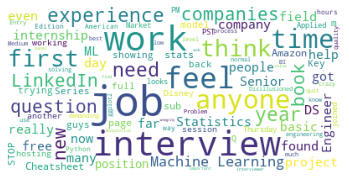

In [84]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
comment1 = ['Top comment 1']
comment2 = ['Top comment 2']
comment3 = ['Top comment 3']
title = ['Post title']
text1 = pd.read_csv('Reddit Data.csv', usecols = title)
stopwords = set(STOPWORDS)
stopwords.update(["and", "or", "but", "go", "the", "data", "data science", "science", "Scientists", "Scientist"])
wordcloud = WordCloud(stopwords = stopwords, max_font_size = 50, max_words = 100, background_color = "white").generate(''.join(text1['Post title']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [77]:
column = myDF['Post score']
#myDF.mean(axis = 'index')
print("The max value is ", column.max())
print("The min value is ", column.min())
print("The range is ", column.max() - column.min())

The max value is  2629
The min value is  340
The range is  2289


## Step 4:
### 10 points
#### Presentation slides:
   
Create presentation slides for this case study. The presentation slides should provide an overview of the problem you tried to solve, methods you have used (don't put actual code in the slides), and if you have discovered new insights from the data you have collected. You may put actual post titles or comments in the slide that you found insightful. The number of slides should be around 6-7 (no hard limit). Three of you will be randomly chosen and be asked to present your work in the class. You should be prepared to present your work for 5 mins.

**Notes on grading**: 5 points will be deducted if you are not prepared to present on the day of submission.

### What to submit:

Put the Jupyter Notebook file and the .csv file in a folder. Then convert your presentation slides in to a PDF file and put it in the same folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be firstname_lastname_casestudy_1.zip . Upload the .zip file on Canvas.

